<a href="https://colab.research.google.com/github/Darsangmdd/Drug-Classification-/blob/main/Drug_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DRUG CLASSIFICATION**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
dataset = pd.read_csv('drug200.csv')
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
dataset['Sex'] = pd.get_dummies(dataset['Sex'])

In [6]:
dataset['BP'] = dataset['BP'].replace({'HIGH':2,'NORMAL':1,'LOW':0})

In [8]:
dataset['Cholesterol'] = dataset['Cholesterol'].replace({'HIGH':1,'NORMAL':0})

In [10]:
dataset['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [17]:
dataset['Drug'] = dataset['Drug'].replace({'drugA':0,'drugB':1,'drugC':2,'drugX':3,'DrugY':4})

In [18]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,4
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,3
4,61,1,0,1,18.043,4


In [19]:
dataset['Drug'].value_counts()

4    91
3    54
0    23
2    16
1    16
Name: Drug, dtype: int64

In [20]:
X= dataset.iloc[:,0:5].values
Y=dataset.iloc[:,-1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 10 )

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[0,4]] =sc.fit_transform(X_train[:,[0,4]])


In [38]:
X_test[:,[0,4]] =sc.transform(X_test[:,[0,4]])

In [39]:
np.set_printoptions(suppress=True)

***LOGISTIC REGRESSION*** 

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
Y_pred  = classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  5  0]
 [ 0  0  0  8  1]
 [ 0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      0.17      0.29         6
           3       0.62      0.89      0.73         9
           4       0.94      1.00      0.97        16

    accuracy                           0.85        40
   macro avg       0.91      0.81      0.80        40
weighted avg       0.89      0.85      0.82        40



**K NEAREST NEIGHBOURS**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
Y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  3  1]
 [ 0  0  0  9  0]
 [ 1  0  0  1 14]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         3
           2       1.00      0.33      0.50         6
           3       0.69      1.00      0.82         9
           4       0.93      0.88      0.90        16

    accuracy                           0.85        40
   macro avg       0.90      0.84      0.83        40
weighted avg       0.88      0.85      0.83        40



In [63]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    error_rate.append(np.mean(Y_pred != Y_test))

Text(0, 0.5, 'Error Rate')

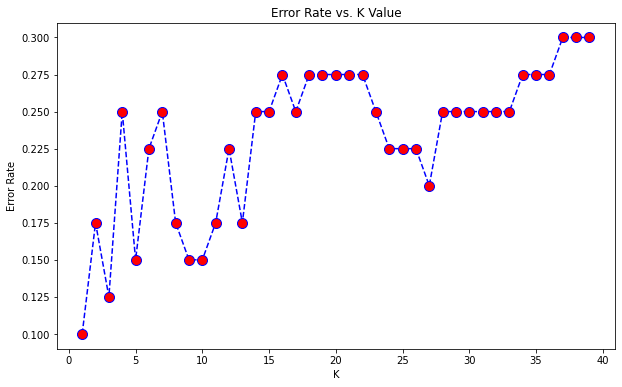

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

***SVM***

In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [47]:
Y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



***NAIVE BAYES*** 

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
Y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  9  0]
 [ 3  0  1  0 12]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      1.00      1.00         3
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00         9
           4       1.00      0.75      0.86        16

    accuracy                           0.90        40
   macro avg       0.90      0.95      0.92        40
weighted avg       0.93      0.90      0.90        40



**DECISION TREE** 

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [53]:
Y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



**RANDOM FOREST CLASSIFIER**

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
Y_pred = classifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

